# MAC0219 EP2 - Cuda & OpenMPI


|                Nome              |   NUSP   |
|----------------------------------|----------|
| Eduardo Freire de Carvalho Lima  | 10262627 |
| Kaique Kazuyoshi Komata          | 10297741 |
| Lucas Civile Nagamine            |  7083142 |
| Victor Hugo Miranda Pinto        | 10297720 |
| Yurick Yussuke Honda             | 10258984 |


## Experimento

O objetivo do experimento é utilizar a experiência com análise de desempenho de programas paralelos, adquirida no
EP1, para planejar e analisar experimentos para determinar parâmetros de configuração de implementações
CUDA e OpenMPI (OMPI) do cálculo do fractal de Mandelbrot.

O experimento é composto pelos códigos implementados no EP1 (sequencial, Pthreads e OMP) e duas novas versões: Cuda e OMPI. Todas as execuções devem respeitar alguns parâmetros fixos: repetições = 15, tamanho da imagem = 4096 e região do conjunto de Mandelbrot = Triple Spiral Valley. Dessa maneira, as variáveis para cada uma das versões a ser comparadas são:

- Sequencial (mandelbrot_seq.c e mandelbrot_seq_sem.c): presença e ausência de alocação de memória e operações de entrada/saída;
- Pthreads (mandelbrot_pth.c): número de threads ($2^0$ a $2^5$);
- OpenMP (mandelbrot_omp.c): número de threads ($2^0$ a $2^5$);
- Cuda (mandelbrot_cuda.c): dimensões quadradas do grid ($x, y$) e dos blocos (($1, 1$), ($2, 2$),..., ($64, 64$));
- OMPI (mandelbrot_ompi.c): número de processos ($1, 8, 16, 32$ e $64$);
- OMPI + OpenMP (mandelbrot_mpi_ompi.c): número de processos ($1, 8, 16, 32$ e $64$) e número de threads ($2^0 a 2^5$).

Para automatizar alguns dos processos deste experimento, utilizamos o script run_measurements.sh.

## Relatório

Primeiramente, rodamos o comando na célula abaixo para instalar e atualizar os pacotes e dependências necessários para a execução dos scripts desse notebook:

In [1]:
] up

   Updating registry at `C:\Users\kaiqu\.julia\registries\General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


Fetching: [========================================>]  99.9 %.6 % %5.3 %====>                                    ]  7.5 %]  8.5 %>                                   ]  10.4 %.1 % [======>                                  ]  14.3 %>                                 ]  16.0 %.2 %>                              ]  24.6 %3 %32.8 %1 %                        ]  39.6 %Fetching: [=================>                       ]  41.5 %>                      ]  42.9 % [===================>                     ]  46.5 %                    ]  48.2 %.3 %=====================>                   ]  52.2 % [======================>                  ]  54.4 % [========================>                ]  57.9 %Fetching: [=========================>               ]  60.7 %>              ]  63.0 %64.9 % %Fetching: [============================>            ]  69.0 %70.8 %]  75.1 % [===============================>         ]  77.5 %       ]  80.3 %      ]  82.8 %>      ]  84.8 % [===================================>

  Installed OpenSSL_jll ─────── v1.1.1+4
  Installed Parsers ─────────── v1.0.6
  Installed RecipesPipeline ─── v0.1.10
  Installed HTTP ────────────── v0.8.15
  Installed Plots ───────────── v1.4.3
  Installed DataFrames ──────── v0.21.3
  Installed DataStructures ──── v0.17.19
  Installed FixedPointNumbers ─ v0.8.1
  Installed IniFile ─────────── v0.5.0
  Installed Zlib_jll ────────── v1.2.11+14
  Installed PlotUtils ───────── v1.0.5
  Installed MbedTLS_jll ─────── v2.16.6+0
  Installed Compat ──────────── v3.12.0
  Installed ColorTypes ──────── v0.10.4
  Installed Colors ──────────── v0.12.2
  Installed GR ──────────────── v0.50.1
   Updating `C:\Users\kaiqu\Desktop\AA\MAC0219\EP2\Project.toml`
  [a93c6f00] ↑ DataFrames v0.21.2 ⇒ v0.21.3
   Updating `C:\Users\kaiqu\Desktop\AA\MAC0219\EP2\Manifest.toml`
  [a93c6f00] ↑ DataFrames v0.21.2 ⇒ v0.21.3
  [864edb3b] ↑ DataStructures v0.17.18 ⇒ v0.17.19
  [c8ffd9c3] ↑ MbedTLS_jll v2.16.0+2 ⇒ v2.16.6+0
  [458c3c95] ↑ OpenSSL_jll v1.1.1+3 ⇒ v1

Depois, rodamos a célula abaixo para verificar os status dos pacotes e ver se há algum problema neles:

In [2]:
] st

Status `C:\Users\kaiqu\Desktop\AA\MAC0219\EP2\Project.toml`
  [336ed68f] CSV v0.6.2
  [a93c6f00] DataFrames v0.21.3
  [91a5bcdd] Plots v1.4.3


Após isso, entramos no modo shell para rodar o script <i>run_measurements.sh</i>, que irá compilar todos os arquivos em C que calculam o Conjunto de Mandelbrot, executar todos os experimentos necessários para os arquivos do EP1 e calcular os tempos de execução com o comando <i>perf stat</i> do Linux. Como o script roda todos os experimentos de uma única vez, sua execução pode demorar algum tempo:

In [6]:
; ./run_measurements.sh

make: Nothing to be done for 'all'.


+ MEASUREMENTS=15
+ THREADS_ITERATIONS=6
+ INITIAL_THREADS=1
+ THREADS=1
+ SIZE=4096
+ NAMES1=('mandelbrot_seq' 'mandelbrot_seq_sem')
+ NAMES2=('mandelbrot_pth' 'mandelbrot_omp')
+ make
+ mkdir results
mkdir: cannot create directory ‘results’: File exists
+ for NAME in ${NAMES1[@]}
+ perf stat -r 15 -n ./mandelbrot_seq -0.188 -0.012 0.554 0.754 4096
+ mv mandelbrot_seq.log results
+ rm output.ppm
+ for NAME in ${NAMES1[@]}
+ perf stat -r 15 -n ./mandelbrot_seq_sem -0.188 -0.012 0.554 0.754 4096
+ mv mandelbrot_seq_sem.log results
+ rm output.ppm
rm: cannot remove 'output.ppm': No such file or directory
+ for NAME in ${NAMES2[@]}
+ (( j=1 ))
+ (( j<=THREADS_ITERATIONS ))
+ perf stat -r 15 -n ./mandelbrot_pth -0.188 -0.012 0.554 0.754 4096 1
+ THREADS=2
+ (( j++ ))
+ (( j<=THREADS_ITERATIONS ))
+ perf stat -r 15 -n ./mandelbrot_pth -0.188 -0.012 0.554 0.754 4096 2
+ THREADS=4
+ (( j++ ))
+ (( j<=THREADS_ITERATIONS ))
+ perf stat -r 15 -n ./mandelbrot_pth -0.188 -0.012 0.554 0.754 4096 4


Ainda no modo shell, rodamos o script <i>ompi_script.sh</i> para calcular o Conjunto de Mandelbrot e executar os experimentos necessários para o programa paralelizado com OMPI e para o programa paralelizado com OMPI + OpenMP. A execução dos experimentos é extensa e pode demorar algumas horas:

In [8]:
; ./ompi_script.sh

mpicc -o mandelbrot_ompi mandelbrot_ompi.c


+ MEASUREMENTS=15
+ SIZE=4096
+ PROCESSES=(1 8 16 32 64)
+ INITIAL_THREADS=1
+ THREADS=1
+ THREADS_ITERATIONS=6
+ make


mpicc -o mandelbrot_mpi_ompi mandelbrot_mpi_ompi.c


+ '[' '!' -d results ']'
+ for PROCESS in ${PROCESSES[@]}
+ perf stat -r 15 -n mpirun -H localhost:1 ./mandelbrot_ompi -0.188 -0.012 0.554 0.754 4096
+ for PROCESS in ${PROCESSES[@]}
+ perf stat -r 15 -n mpirun -H localhost:8 ./mandelbrot_ompi -0.188 -0.012 0.554 0.754 4096
+ for PROCESS in ${PROCESSES[@]}
+ perf stat -r 15 -n mpirun -H localhost:16 ./mandelbrot_ompi -0.188 -0.012 0.554 0.754 4096
+ for PROCESS in ${PROCESSES[@]}
+ perf stat -r 15 -n mpirun -H localhost:32 ./mandelbrot_ompi -0.188 -0.012 0.554 0.754 4096
+ for PROCESS in ${PROCESSES[@]}
+ perf stat -r 15 -n mpirun -H localhost:64 ./mandelbrot_ompi -0.188 -0.012 0.554 0.754 4096
+ mv mandelbrot_ompi.log results
+ for PROCESS in ${PROCESSES[@]}
+ (( i=1 ))
+ (( i<=THREADS_ITERATIONS ))
+ perf stat -r 15 -n mpirun -H localhost:1 ./mandelbrot_mpi_ompi -0.188 -0.012 0.554 0.754 4096 1
+ THREADS=2
+ (( i++ ))
+ (( i<=THREADS_ITERATIONS ))
+ perf stat -r 15 -n mpirun -H localhost:1 ./mandelbrot_mpi_ompi -0.188 -0.012 0.554 0.

Devido à necessidade do uso da gpu, o script referente aos testes para o cálculo do Conjunto de Mandelbrot do código paralelizado com CUDA foi executado numa máquina da Rede Linux do IME-USP. Por conta disso, não foi possível adicionar a célula da execução para esse script como feito com os outros. Além disso, diferentemente dos outros, a execução dos testes da versão CUDA não levou uma quantidade grande de tempo.

Na célula abaixo é definida a função <i>confidence_interval</i>, que faz o cálculo de intervalo de confiança e irá ser utilizada na manipulação dos resultados e na construção do DataFrame.

In [3]:
function confidence_interval(sd)
    return Float64(1.96) * sd / Float64(sqrt(10))
end

confidence_interval (generic function with 1 method)

O script <i>run_measurements</i> criará pastas com arquivos log que contém os resultados dos experimentos  <b>relativos às implementações do EP1</b>. Para podermos analisar esses resultados e produzir gráficos, executamos o código da célula abaixo para ler todos os arquivos log, extrair as informações que queremos e criar um CSV (results.csv) a partir delas.

In [4]:
using Printf

function mean_and_ci_from_line(line)
    mean, ci, count = 0, 0, 0
    for token in split(line, " ")
        num = tryparse(Float64, replace(replace(token, "%" => ""), "," => "."))
        if num !== nothing
            count += 1
            if count == 1
                mean = num
            else
                sd = mean * num / Float64(100)
                ci = confidence_interval(sd)
            end
        end
        if count >= 2 break end
    end
    return mean, ci
end
    
function log_to_csv_ep1(script, csv_file, threads_enabled)
    log_path = @sprintf("results/%s.log", script)
    threads = 1
    mean, ci = 0, 0
    
    open(log_path) do log_file
        for (i, line) in enumerate(eachline(log_file))
            if (i + 1) % 5 != 0 continue end
    
            mean, ci = mean_and_ci_from_line(line)
            
            write(csv_file, @sprintf("%s,%d,%.9F,%.9F\n", script, threads, mean, ci))  
            if threads_enabled threads *= 2 end
        end
    end
end
    
function log_to_csv_handler_ep1(scripts)
    csv_file = open("results_ep1.csv", "w")
    write(csv_file, "script,threads,mean,ci\n")
    
    for script in scripts
        threads_enabled = !startswith(script, "mandelbrot_seq")
        log_to_csv_ep1(
            script,
            csv_file,
            threads_enabled
        ) 
    end
    
    close(csv_file)
end

scripts = ["mandelbrot_seq", "mandelbrot_seq_sem", "mandelbrot_pth", "mandelbrot_omp"]
log_to_csv_handler_ep1(scripts)

Então, obtemos um dataframe a partir do CSV gerado.

In [26]:
using CSV

df = CSV.read("results_ep1.csv")

,script,threads,mean,ci
,String,Int64,Float64,Float64
1,mandelbrot_seq,1,24.0919,0.0268782
2,mandelbrot_seq_sem,1,23.1015,0.0114548
3,mandelbrot_pth,1,23.3108,0.00433445
4,mandelbrot_pth,2,12.7285,0.00394459
5,mandelbrot_pth,4,8.21261,0.0066173
6,mandelbrot_pth,8,7.77238,0.0101165
7,mandelbrot_pth,16,7.79411,0.0251204
8,mandelbrot_pth,32,7.7193,0.00526292
9,mandelbrot_omp,1,23.2023,0.00287619


E, então, repetimos o mesmo processo para a implementação OMPI:

In [22]:
using Printf
    
function log_to_csv_ompi(script, csv_file)
    log_path = @sprintf("results/%s.log", script)
    processes = [1, 8, 16, 32, 64]
    mean, ci = 0, 0
    j = 1
    
    open(log_path) do log_file
        for (i, line) in enumerate(eachline(log_file))
            if (i + 1) % 5 != 0 continue end
            
            mean, ci = mean_and_ci_from_line(line)
            
            write(csv_file, @sprintf("%s,%d,%.9F,%.9F\n", script, processes[j], mean, ci))  
            j += 1
        end
    end
end
    
function log_to_csv_handler_ompi(scripts)
    csv_file = open("results_ompi.csv", "w")
    write(csv_file, "script,processes,mean,ci\n")
    
    for script in scripts
        log_to_csv_ompi(
            script,
            csv_file
        ) 
    end
    
    close(csv_file)
end

scripts = ["mandelbrot_ompi"]
log_to_csv_handler_ompi(scripts)

E geramos o dataframe relativo aos dados do OMPI:

In [23]:
using CSV

df_ompi = CSV.read("results_ompi.csv")

,script,processes,mean,ci
,String,Int64,Float64,Float64
1,mandelbrot_ompi,1,30.7906,0.0229011
2,mandelbrot_ompi,8,18.0055,0.161819
3,mandelbrot_ompi,16,17.9517,0.164674
4,mandelbrot_ompi,32,19.1304,0.216986
5,mandelbrot_ompi,64,23.8729,0.250062


O mesmo processo para OMPI + OMP:

In [24]:
using Printf
    
function log_to_csv_ompi_omp(script, csv_file)
    log_path = @sprintf("results/%s.log", script)
    processes = [1, 8, 16, 32, 64]
    threads = [1, 2, 4, 8, 16, 32]
    mean, ci = 0, 0
    k = 1
    j = 1
    
    open(log_path) do log_file
        for (i, line) in enumerate(eachline(log_file))
            if (i + 1) % 5 != 0 continue end
            
            mean, ci = mean_and_ci_from_line(line)
            
            write(csv_file, @sprintf("%s,%d,%d,%.9F,%.9F\n", script, processes[j], threads[k], mean, ci))  
            k += 1
            if k == 7
                k = 1
                j += 1
            end
        end
    end
end
    
function log_to_csv_handler_ompi_omp(scripts)
    csv_file = open("results_mpi_ompi.csv", "w")
    write(csv_file, "script,processes,threads,mean,ci\n")
    
    for script in scripts
        log_to_csv_ompi_omp(
            script,
            csv_file
        ) 
    end
    
    close(csv_file)
end

scripts = ["mandelbrot_mpi_ompi"]
log_to_csv_handler_ompi_omp(scripts)

In [13]:
using CSV

df_mpi_ompi = CSV.read("results_mpi_ompi.csv")

,script,processes,threads,mean,ci
,String,Int64,Int64,Float64,Float64
1,mandelbrot_mpi_ompi,1,1,26.3924,0.376238
2,mandelbrot_mpi_ompi,1,2,25.2983,0.00627201
3,mandelbrot_mpi_ompi,1,4,25.2817,0.00470093
4,mandelbrot_mpi_ompi,1,8,25.2812,0.00470083
5,mandelbrot_mpi_ompi,1,16,25.2759,0.00469986
6,mandelbrot_mpi_ompi,1,32,25.2386,0.00312861
7,mandelbrot_mpi_ompi,8,1,9.27202,0.0155165
8,mandelbrot_mpi_ompi,8,2,9.343,0.034166
9,mandelbrot_mpi_ompi,8,4,9.29478,0.0207395


E, por fim, para Cuda:

In [5]:
using Printf
    
function log_to_csv_cuda(script, csv_file)
    log_path = @sprintf("results/%s.log", script)
    grid = [1, 2, 4, 8, 12, 16, 24, 32, 48, 64]
    mean, ci = 0, 0
    j = 1
    
    open(log_path) do log_file
        for (i, line) in enumerate(eachline(log_file))
            if (i + 1) % 5 != 0 continue end
            
            mean, ci = mean_and_ci_from_line(line)
            
            write(csv_file, @sprintf("%s,%d,%.9F,%.9F\n", script, grid[j], mean, ci))  
            j += 1
        end
    end
end
    
function log_to_csv_handler_cuda(scripts)
    csv_file = open("results_cuda.csv", "w")
    write(csv_file, "script,grid,mean,ci\n")
    
    for script in scripts
        log_to_csv_cuda(
            script,
            csv_file
        ) 
    end
    
    close(csv_file)
end

scripts = ["mandelbrot_cuda"]
log_to_csv_handler_cuda(scripts)

In [7]:
using CSV

df_cuda = CSV.read("results_cuda.csv")

,script,grid,mean,ci
,String,Int64,Float64,Float64
1,mandelbrot_cuda,1,2.25133,2.2047e-5
2,mandelbrot_cuda,2,1.19167,8.937e-6
3,mandelbrot_cuda,4,0.68676,2.3922e-5
4,mandelbrot_cuda,8,0.62615,3.1862e-5
5,mandelbrot_cuda,12,0.98198,1.7407e-5
6,mandelbrot_cuda,16,1.25094,2.8455e-5
7,mandelbrot_cuda,24,1.72821,5.4415e-5
8,mandelbrot_cuda,32,2.26355,4.9665e-5
9,mandelbrot_cuda,48,3.27187,6.6516e-5


## Análise

Após construir os DataFrames com os dados, podemos iniciar a contrução dos gráficos e análise deles.<br>

Primeiramente será feita uma análise separada para cada código executado, comparando os resultados nos diferentes parâmetros e depois, será feita uma análise comparando os resultados entre os códigos, relacionando-os.

### Sequencial

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260


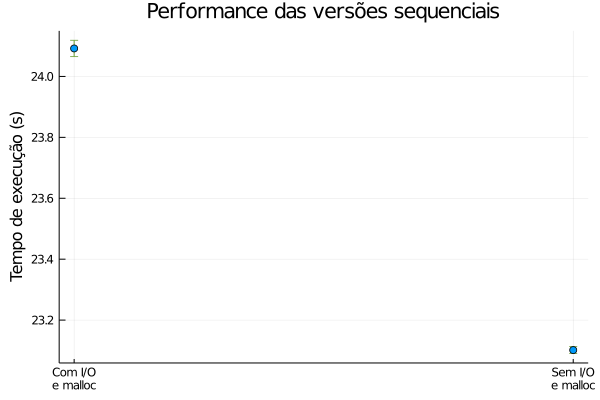

In [7]:
using Plots

function plot_seq(data)
    plt = plot(
        title = "Performance das versões sequenciais",
        ylabel = "Tempo de execução (s)",
    )
    scatter!(
        ["Com I/O\ne malloc", "Sem I/O\ne malloc"],
        data.mean,
        yerror = data.ci,
        label = nothing,
        position = :center
    )
    display(plt)
end

plot_seq(filter(row -> startswith(row.script, "mandelbrot_seq"), df))

Entre as duas versões sequenciais testadas, há apenas uma diferença: a presença/ausência de alocação de memória e operações de entrada e saída. Antes de executarmos os testes, e com base na experiência que adquirimos no EP1, previmos que a versão com essas operações naturalmente apresentaria um tempo de execução ligeiramente maior.

Nossa previsão mostrou-se correta: a versão com malloc e I/O apresentou um tempo médio de 24.0919 segundos, enquanto a implementação sem malloc e I/O levou um tempo médio 4.11% menor, 23.1015 segundos.

### Pthreads

Como os parâmetros para o experimento são fixos dessa vez, com exceção do número de threads, iremos analisar os resultados do programa paralelizado com pthreads focando apenas nas médias do tempo de execução e no número de threads.

A função <i>plot_pth</i> definida abaixo recebe um conjunto de dados e constrói um gráfico que relaciona a média do tempo de execução no eixo Y com o número de threads no eixo X:

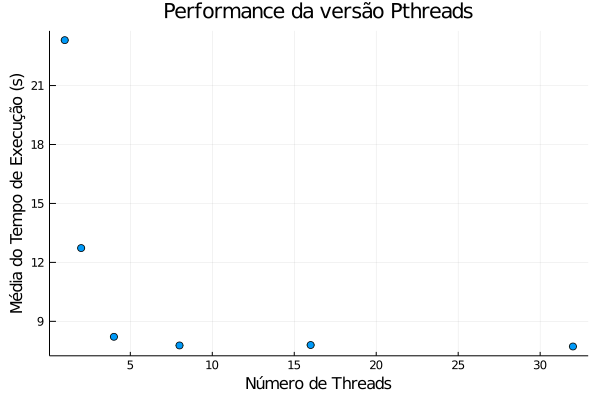

In [8]:
using Plots
function plot_pth(data, name)
    fig = plot(xlabel = "Número de Threads", ylabel = "Média do Tempo de Execução (s)",
        legend = :topright, title = name)   
    scatter!(
        data.threads,
        data.mean,
        yerror = data.ci,
        label = nothing,
    )
    display(fig)
end 

plot_pth(filter(row -> startswith(row.script, "mandelbrot_pth"), df), "Performance da versão Pthreads")

Para a implementação com Pthreads, as execuções variaram apenas no número de threads. Os valores foram 1, 2, 4, 8, 16 e 32. Com base na experiência que adquirimos no EP1, sabíamos que, **até certo limite**, quanto mais threads utilizarmos, menos tempo será gasto no total. No entanto, após uma determinada quantidade de threads, é possível chegar a um ponto em que o overhead de tempo para gerenciá-las ultrapassa o ganho de tempo obtido com seu uso.

Pelos experimentos anteriores, sabíamos que o valor máximo de threads testado, 32, não atingiria esse limite e, portanto, conforme aumentamos o número de threads, o tempo médio gasto com a execução do programa seria menor.

Ao executarmos os testes, essas predições se confirmaram: de fato, a cada aumento no número de threads, o tempo de execução foi reduzido. Com 1 thread, gastou-se 23.3108 segundos, enquanto com 32 threads chegamos ao valor mínimo de 7.7193 segundos. Uma exceção a essa "escala decrescente" foi de 8 para 16 threads, em que o tempo aumentou de 7.77238 s para 7.79411 s. No entanto, se levarmos em consideração o intervalo de confiança 95% dos dois casos, é possível (e provável) que o valor para 16 threads seja de fato menor que para 8 threads.

É válido destacar que, a cada aumento no número de threads, o ganho de tempo se torna menor, conforme mostra a tabela abaixo:

| Aumento no número de threads | Variação de tempo |
|------------------------------|-------------------|
| De 1 para 2                  | -44.96%           |
| De 2 para 4                  | -35.48%           |
| De 4 para 8                  | -5.36%            |
| De 8 para 16                 | +0.28%            |
| De 16 para 32                | -0.96%            |

Isso se dá devido a alguns motivos, dentre os quais se destacam o overhead de tempo obtido quando é preciso gerenciar um número maior de threads e o fato de o número de threads exceder a quantidade de núcleos físicos, o que não permite um ganho de mesma proporção no tempo.

### OpenMP

Similarmente à seção de Pthreads, nosso experimento com OpenMP se restringe aos testes com diferentes quantidades de threads.

A função <i>plot_omp</i> definida abaixo recebe um conjunto de dados e constrói um gráfico que relaciona a média do tempo de execução no eixo Y com o número de threads no eixo X:

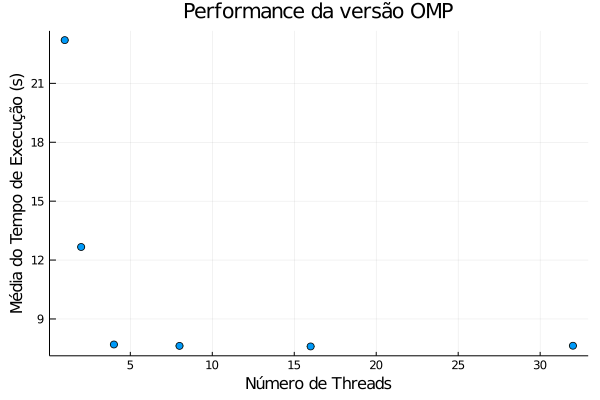

In [9]:
using Plots
function plot_omp(data, name)
    fig = plot(xlabel = "Número de Threads", ylabel = "Média do Tempo de Execução (s)",
        legend = :topright, title = name)   
    scatter!(
        data.threads,
        data.mean,
        yerror = data.ci,
        label = nothing,
    )
    display(fig)
end 

plot_omp(filter(row -> startswith(row.script, "mandelbrot_omp"), df), "Performance da versão OMP")

Como já comentamos na seção de Pthreads sobre nossas expectativas quanto à relação entre quantidade de threads utilizada e o tempo de execução, nos abstemos de repeti-las aqui. O que vale ser destacado é que os resultados se mostraram bastante semelhantes, com reduções nos tempos de execução observados conforme aumentamos a quantidade de threads.

Dois pontos merecem ser abordados à parte:

1. É interessante observar a performance ligeiramente melhor da versão com OMP comparada a Pthreads, como podemos observar nesta tabela:

| Número de threads | Tempo de OMP em relação a Pthreads |
|-------------------|------------------------------------|
| 1                 | -0,465%                            |
| 2                 | -0,494%                            |
| 4                 | -6,24%                             |
| 8                 | -1,86%                             |
| 16                | -2.49%                             |
| 32                | -1,08%                             |


2. A implementação com OpenMP registrou uma piora de tempo de 16 para 32 threads (um aumento médio de 7.59968 s para 7.63577 s), que se mantém mesmo quando levamos os intervalos de confiança em consideração. Isso pode significar que, a partir de 32 threads, a versão com OMP já começa a apresentar uma piora em desempenho - dados os motivos listados no fim da última seção. É possível, mas improvável, que esse aumento de tempo seja devido apenas a um desvio atípico dos dados em nosso experimento.

### OMPI

Na versão OMPI, assim como nas outras, a maioria dos parâmetros experimentados é fixa. Os testes se restringem, portanto, à quantidade de processos utilizados.

A função <i>plot_ompi</i> definida abaixo recebe um conjunto de dados e constrói um gráfico que relaciona a média do tempo de execução no eixo Y com o número de processos no eixo X:

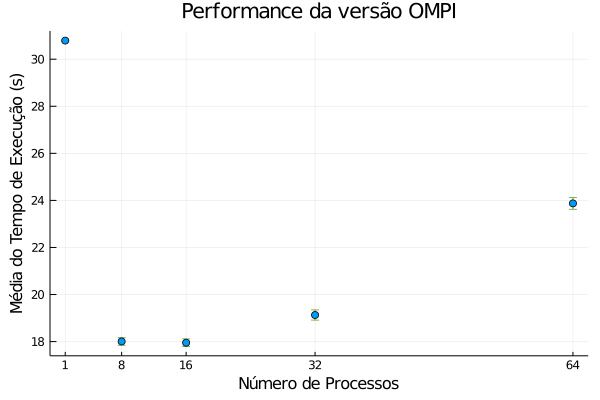

In [10]:
using Plots
function plot_ompi(data, name)
    fig = plot(xlabel = "Número de Processos", ylabel = "Média do Tempo de Execução (s)",
        legend = :topright, title = name, xticks=[1,8,16,32,64])   
    scatter!(
        data.processes,
        data.mean,
        yerror = data.ci,
        label = nothing,
    )
    display(fig)
end 

plot_ompi(df_ompi, "Performance da versão OMPI")

Nos resultados do experimento, a melhor performance no cálculo do conjunto de mandelbrot com base nas médias dos tempos de execução apresentada foi a execução com 16 processos com 17,95 segundos, enquanto a pior foi a execução com 1 processo com 30,79 segundos.

Observando os resultados dos gráficos é possível perceber um resultado peculiar. Diferentemente do esperado, a performance do cálculo do conjunto de mandelbrot não se mostra proporcional à quantidade de processos usados no cálculo.

É possível visualizar que a média do tempo de execução vai diminuindo à medida que a quantidade de processos vai aumentando. Entretanto, esse comportamento se altera depois de 16 processos, com a média do tempo de execução tendendo a aumentar à medida que o número de processos também aumenta.

Observando a tabela abaixo com as porcentagens das variações das médias dos tempo de execução do cálculo do conjunto de mandelbrot nas transições entre os números de processos, é possível observar o comportamento descrito anteriormente:

| Aumento no número de processos | Variação da média de tempo |
|--------------------------------|----------------------------|
| De 1 para 8                    | -41,52%                    |
| De 8 para 16                   | -0,29%                     |
| De 16 para 32                  | +6,56%                     |
| De 32 para 64                  | +24,79%                    |
|                                |                            |
| De 1 para 16                   | -41,69%                    |
| De 16 para 64                  | +32,98%                    |

Na tabela acima também é possível observar a variação no tempo médio de execução do pior parâmetro (1 processo) para o tempo médio de execução do melhor parâmetro (16 processos). Além disso, pode se observar que a variação na performance da execução com 16 processos comparada com a de 64 processos é consideravelmente alta, com um aumento em segundos de ~33%.

O comportamento de aumento no tempo médio de execução em números de processos maiores pode se dar devido à um overhead de comunicação maior entre os processos (um processo precisa se comunicar/esperar por vários outros processos) ou às características e especificações da máquina onde os testes foram feitos (a máquina pode não lidar muito bem com uma paralelização muito alta).

É válido ressaltar que mesmo com a performance piorando nos números de processos maiores, esta ainda se mostra melhor do que a performance na execução com apenas 1 processo, tendo uma média de 23,87 segundos para a execução com 64 processos comparado com os 30,79 segundos da execução usando 1 processo.

### CUDA

Na versão CUDA, a região do conjunto e o tamanho da imagem são fixos. A variável de execução, portanto, é apenas a dimensão do grid. Os grids que utilizamos possuem sempre as dimensões X e Y iguais (ou seja, é quadrado).

Dessa maneira, a função <i>plot_cuda</i> definida abaixo recebe um conjunto de dados e constrói gráficos que relacionam as médias dos tempos de execução com o a dimensão do grid utilizado: 

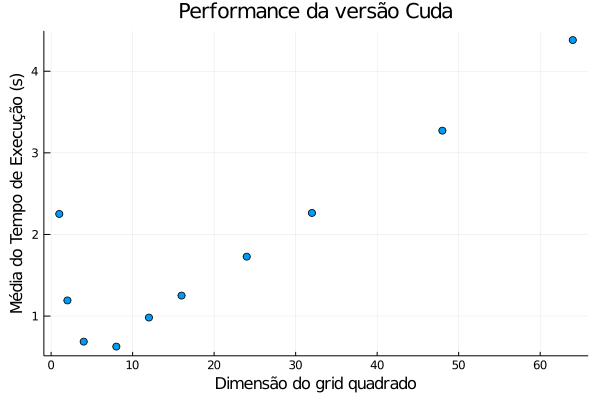

In [9]:
using Plots
function plot_cuda(data)
    fig = plot(xlabel = "Dimensão do grid quadrado", ylabel = "Média do Tempo de Execução (s)",
        legend = :topright, title = "Performance da versão Cuda")   
    scatter!(
        data.grid,
        data.mean,
        yerror = data.ci,
        label = nothing,
    )
    display(fig)
end 

plot_cuda(df_cuda)

### OMPI + OMP

Na versão OMPI + OMP, é levado em consideração dois parâmetros variáveis para os testes: o número de processos e o número de threads. Fora eles, os outros parâmetros são fixos, como nos outros programas.

A função <i>plt_mpi_omp</i> definida abaixo recebe um conjunto de dados e constrói gráficos que relacionam as médias dos tempos de execução com o número de threads para cada valor no número de processos: 

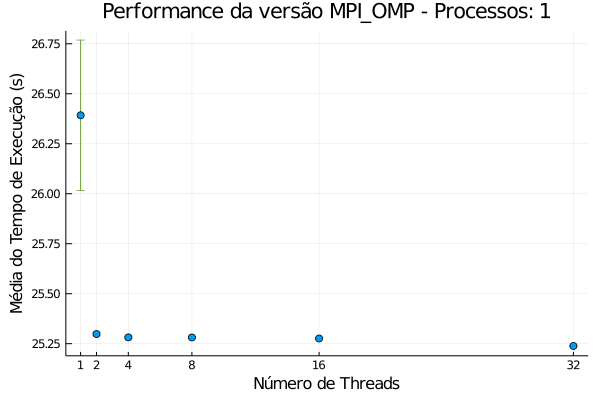

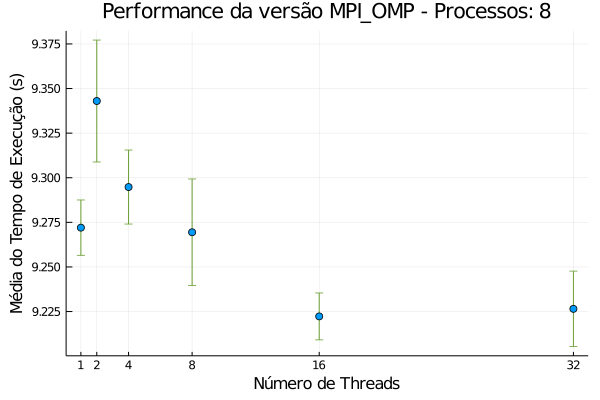

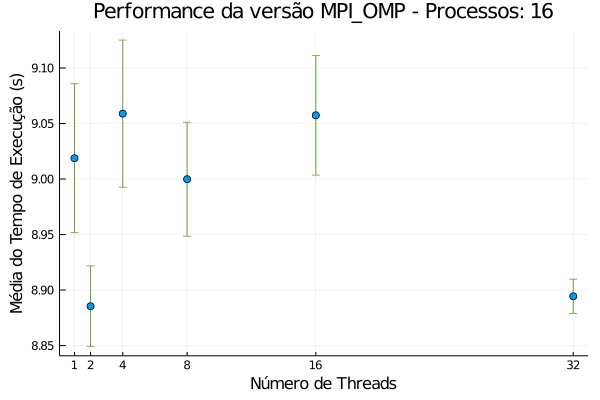

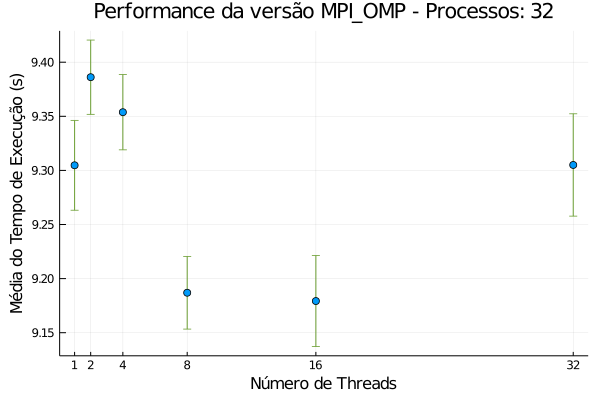

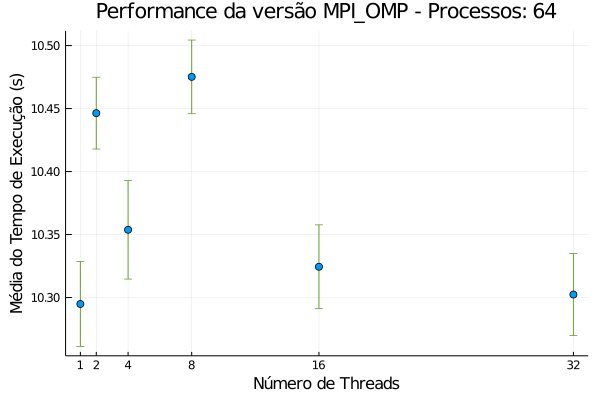

In [15]:
using Plots
function plot_mpi_omp(data)
    for p in [1,8,16,32,64]
        d = data[data[!, :processes] .== p, :]
        fig = plot(xlabel = "Número de Threads", ylabel = "Média do Tempo de Execução (s)",
            legend = :topright, title = string("Performance da versão MPI_OMP - Processos: ", p), xticks=[1,2,4,8,16,32])   
        scatter!(
            d.threads,
            d.mean,
            yerror = d.ci,
            label = nothing,
        )
        display(fig)
    end
end 

plot_mpi_omp(df_mpi_ompi)

Primeiramente, observando em conjunto os resultados dos gráficos, é possível observar que os valores das médias dos tempos de execução das execuções usando mais de 1 processo são bem menores que as médias para as execuções usando apenas 1 processo, para todos os valores de número de threads. Também é possível observar que apenas o gráfico para a execução com 1 processo apresenta um certo tipo de padrão nos resultados, enquanto os outros gráficos possuem seus dados mais dispersos e diferentes.

No gráfico referente à execução com apenas 1 processo, é possível ver o mesmo padrão encontrado na análise do OpenMP, de que o tempo médio de execução é proporcional ao valor do número de threads, diminuindo à medida que o número de threads aumenta. Esse comportamento é condizente com o esperado visto que a execução com 1 processo equivale à execução sem o uso da paralelização com OMPI, se tornando apenas uma execução paralelizada com OpenMP.

Nos gráficos referentes aos outros valores testados de números de processos, os resultados se apresentam de forma mais caótica e não padronizada com variações oscilantes. Algumas performances na execução com números de threads maiores chegam a se mostram piores do que execuções com números de threads mais baixos.

Utilizando o gráfico referente ao experimento com 32 processos como exemplo, é possível visualizar que a performance melhora com 8 e 16 threads comparado com os valores de threads menores, mas que piora consideravelmente ao chegar no valor de 32 threads. Enquanto isso, no gráfico referente ao experimento com 16 processos, temos que as melhores performances são atingidas nas execuções com 2 e 32 threads e as piores com 4 e 16 threads.

Observando a tabela abaixo, podemos observar que a melhor performance observada foi de 8,88 segundos e foi obtida na execução com 16 processos e 2 threads:

| Nº de Processos | Melhor Média de Tempo Observada (s)| Nº de Threads |
|-----------------|------------------------------------|---------------|
|         1       |           25,23                    |       32      |
|         8       |           9,22                     |       16      |
|         16      |           8,88                     |       2       |
|         32      |           9,17                     |       16      |
|         64      |           10,29                    |       1       |

Uma conclusão importante que pode ser obtida desses resultados é que mesmo que as execuções com altos níveis de paralelização  com OMPI (números altos de processos) não se mostrem ser as melhores no quesito performance, a diferença delas para as execuções sem nenhum nível dessa paralelização ainda é muito grande. No caso dessa execução OMPI + OpenMP, podemos ver que a pior performance aplicando um número de processos maior que 1 foi de 10,47 segundos, enquanto a melhor performance utilizando apenas 1 processo foi de 25,23 segundos, um aumento de 140,97%.

É possível também inverter a coluna de threads com a coluna de processos, e assim analisar os gráficos que relacionam a médias dos tempos de execução com o números de processos para cada número de threads. A função <i>plot_mpi_omp_2</i> definida abaixo constrói esses novos gráficos:

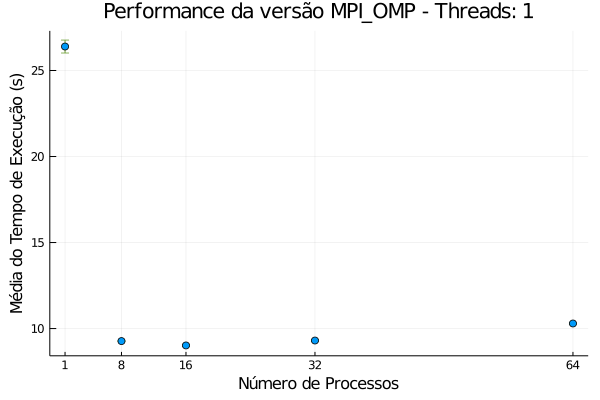

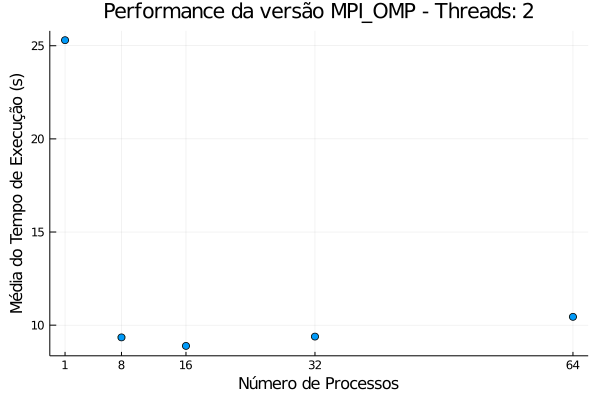

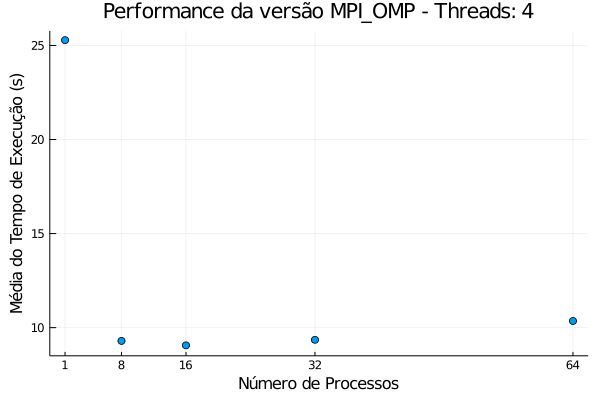

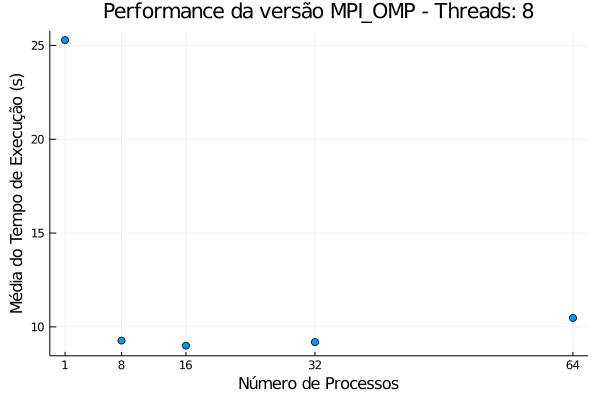

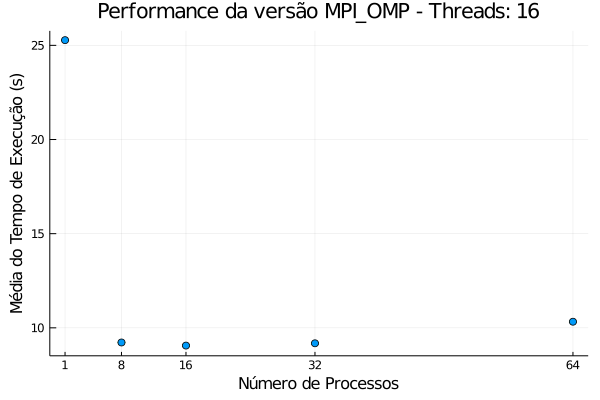

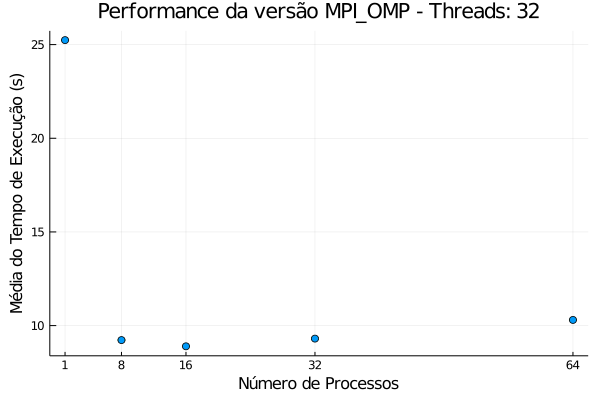

In [14]:
using Plots
function plot_mpi_omp_2(data)
    for t in [1,2,4,8,16,32]
        d = data[data[!, :threads] .== t, :]
        fig = plot(xlabel = "Número de Processos", ylabel = "Média do Tempo de Execução (s)",
            legend = :topright, title = string("Performance da versão MPI_OMP - Threads: ", t), xticks=[1,8,16,32,64])   
        scatter!(
            d.processes,
            d.mean,
            yerror = d.ci,
            label = nothing,
        )
        display(fig)
    end
end 

plot_mpi_omp_2(df_mpi_ompi)

Observando os novos gráficos é possível perceber que, diferentemente da execução anterior, todos os gráficos possuem um padrão na apresentação dos seus dados e esse padrão é o mesmo para todos eles. Além disso, esse padrão é o mesmo visto na análise das execuções feitas com paralelização OMPI apenas. Assim, temos que a média do tempo de execução vai diminuindo à medida que o número de processos vai aumentando até a marca de 16 processos. A partir daí, a média do tempo de execução começa a aumentar junto com o valor do número de processos mas não chegando aos valores altos da execução com apenas 1 processo.

Portanto, com esses resultados, podemos de uma certa concluir que para qualquer valor de número de threads, as execuções utilizando 16 processos possuem a melhor performance baseada no tempo de execução.

### Comparação e Conclusão?